# Project: IMDB investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We have an IMDB dataset, and we will be exploring, wrangling and answering some questions.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Goal:
**In this dataset I would like to explore what are the different factors that affect the <span style ="color:red"> Ratings </span> of a movies and to what extent**.


# Questions:

### <a href="#quest1"> Research Question 1</a> : Does length of the movie `runtime` plays any role in the `Ratings`.
### <a href="#quest2"> Research Question 2</a> : Does `Finances (budget, revenue)` of the movie plays any role to have heigher `Ratings`.
### <a href="#quest3"> Research Question 3</a> : Role of `Director`, in the movie `Ratings`.

In [2]:
# importing the dataset
df_original = pd.read_csv('tmdb-movies.csv')

In [3]:
df_original.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Create a copy of original dataframe:
So that we can analyse the dataframe without changing the original dataset and also to compare the difference later.

In [4]:
df = df_original.copy()

In [5]:
df.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3447,71880,tt0810913,1.123666,79000000,149673788,Jack and Jill,Adam Sandler|Katie Holmes|Al Pacino|Eugenio De...,http://www.jackandjill-movie.com/,Dennis Dugan,His twin sister is coming for the holidays... ...,...,"Jack Sadelstein, a successful advertising exec...",91,Comedy,Columbia Pictures|Happy Madison Productions|Br...,11/11/11,371,4.2,2011,7.658245e+07,1.450935e+08


In [6]:
df.shape

(10866, 21)

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
df.vote_average.mean()

5.9749217743419845

In [11]:
df.vote_average.describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [12]:
# To see the movie with highest ratings.
df.query('vote_average == 9.2')['original_title'].values[0]

'The Story of Film: An Odyssey'

<span style="color:orange">'The Story of Film: An Odyssey'</span> is the highest rated movie in the list of 10866 movies according to the dataset.

<a id='wrangling'></a>
## Data Wrangling

### Some columns are not required for our analysis.
We need to remove them to make dataset for efficent and clean.

In [13]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Droping:
**columns**: *'id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'*.

In [14]:
# Dropping columns that will not be helpful in our journey to explose truth.
df.drop(['id','imdb_id', 'homepage','tagline','keywords', 'overview','production_companies', 'release_date'], axis = 1, inplace = True)

In [15]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Checking if popularity has something to do with vote_counts

0.800827976933


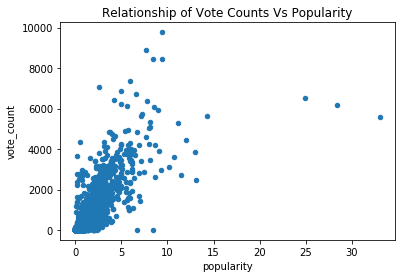

In [17]:
print(np.corrcoef(df.popularity, df.vote_count)[0][1])
df.plot(x='popularity', y = 'vote_count', kind='scatter', title="Relationship of Vote Counts Vs Popularity");

#### Findings:
- A very strong correlation between the two.
- We don't need both, we can use either of the one for analysis.

### Conclusions:
- We can drop popularity.

In [18]:
df.drop('popularity', axis=1, inplace = True)

In [19]:
df.sample()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3387,80000000,214918407,Just Go With It,Jennifer Aniston|Adam Sandler|Nicole Kidman|Ba...,Dennis Dugan,117,Romance|Comedy,1010,6.3,2011,7.755184e+07,2.083415e+08


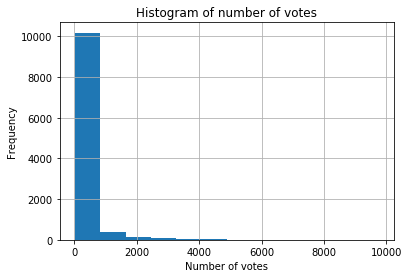

In [20]:
df.vote_count.plot(bins=12, kind = 'hist', grid=True, title="Histogram of number of votes" )
plt.xlabel('Number of votes');

In [21]:
df.budget.describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

### Findings:
- More than half of the movies has Zero buget, revenue:
- Analysing movies with zero or very less budget

In [22]:
# Description of movies with no budget
df.query('budget == 0').describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5696.0,5.696000e+03,5696.000000,5696.000000,5696.000000,5696.000000,5696.0,5.696000e+03
mean,0.0,3.106567e+06,97.512289,43.842872,5.923016,2001.386060,0.0,5.245240e+06
std,0.0,1.415789e+07,36.917841,69.771873,0.976305,13.687058,0.0,2.456335e+07
min,0.0,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.0,0.000000e+00
25%,0.0,0.000000e+00,88.000000,13.000000,5.300000,1994.000000,0.0,0.000000e+00
50%,0.0,0.000000e+00,95.000000,21.000000,6.000000,2007.000000,0.0,0.000000e+00
75%,0.0,0.000000e+00,106.000000,43.000000,6.600000,2012.000000,0.0,0.000000e+00
max,0.0,2.536254e+08,900.000000,1329.000000,9.200000,2015.000000,0.0,4.559735e+08


In [23]:
df.query('budget !=0').describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5.170000e+03,5.170000e+03,5170.000000,5170.000000,5170.000000,5170.000000,5.170000e+03,5.170000e+03
mean,3.073943e+07,8.027566e+07,107.093230,408.593424,6.032108,2001.252805,3.688774e+07,1.021757e+08
std,3.890065e+07,1.594749e+08,22.808798,788.249398,0.884156,11.775932,4.195701e+07,1.959055e+08
min,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,6.000000e+06,0.000000e+00,93.000000,35.250000,5.500000,1996.000000,8.102293e+06,0.000000e+00
50%,1.700000e+07,2.100078e+07,103.000000,122.000000,6.100000,2005.000000,2.272271e+07,2.853699e+07
75%,4.000000e+07,8.942473e+07,117.000000,402.000000,6.600000,2010.000000,5.007483e+07,1.133573e+08
max,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
df.query('budget ==0 & revenue == 0').revenue_adj.count() / df.query('budget == 0').revenue_adj.count()

0.8253160112359551

In [25]:
# proportion of movies with no revenue but has some budget
df.query('budget !=0 & revenue == 0').revenue_adj.count() / df.query('budget != 0').revenue_adj.count()

0.25435203094777564

### Findings:
- Movies `without budget` has **less** `revenue`and `vote_count`, as expected.
- `82.5%` of movies `without budget` has no `revenue`.
- Only `25.4%` of movies `with budget` has got no `revenue`. 

### Now analysing movies with no revenue.

In [26]:
df.query('revenue == 0').describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6.016000e+03,6016.0,6016.000000,6016.000000,6016.000000,6016.000000,6.016000e+03,6016.0
mean,2.578095e+06,0.0,97.319315,40.975731,5.834774,2001.645944,3.354166e+06,0.0
std,8.818167e+06,0.0,36.998833,67.208526,1.010550,13.726299,1.143445e+07,0.0
min,0.000000e+00,0.0,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.0
25%,0.000000e+00,0.0,88.000000,13.000000,5.200000,1996.000000,0.000000e+00,0.0
50%,0.000000e+00,0.0,95.000000,21.000000,5.900000,2007.000000,0.000000e+00,0.0
75%,0.000000e+00,0.0,105.000000,40.000000,6.500000,2012.000000,0.000000e+00,0.0
max,1.500000e+08,0.0,900.000000,1143.000000,9.200000,2015.000000,1.500000e+08,0.0


In [27]:
df.query('revenue != 0').describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### Findings:
- `6000` movies has `No revenue`.
- While only `4850` movies has `Revenue` in the dataset.
- Movies with `No Revenue` are **10 times** cheaper to produce, on average.
- Movies with `Revenue` are **10 times** more popular, on average.

### Conclusion:
- **We should remove movies with no revenue and which are least popular, for better analysis**.

## Action:
**REMOVING movies with `NO REVENUE` and `VOTE COUNT less than 40`**.

In [28]:
df= df.query('revenue != 0 & vote_count > 40')

In [29]:
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.804000e+03,3.804000e+03,3804.000000,3804.000000,3804.000000,3804.000000,3.804000e+03,3.804000e+03
mean,3.573492e+07,1.107334e+08,109.018139,550.050210,6.233807,2002.151682,4.182703e+07,1.407096e+08
std,4.330806e+07,1.768697e+08,21.537532,876.955168,0.764921,11.141188,4.622722e+07,2.164245e+08
min,0.000000e+00,2.000000e+00,26.000000,41.000000,3.300000,1960.000000,0.000000e+00,2.370705e+00
25%,6.000000e+06,1.605603e+07,95.750000,100.000000,5.700000,1996.000000,8.421562e+06,2.064956e+07
50%,2.107500e+07,4.974917e+07,105.000000,230.000000,6.300000,2005.000000,2.744831e+07,6.738430e+07
75%,5.000000e+07,1.281778e+08,119.000000,588.250000,6.800000,2011.000000,5.949180e+07,1.688375e+08
max,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [30]:
df.shape

(3804, 12)

**Now we have 3804 movies which has got some revenue and which has vote counts more than 40**.
#### Droping duplicates:

In [31]:
df[df.duplicated()]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

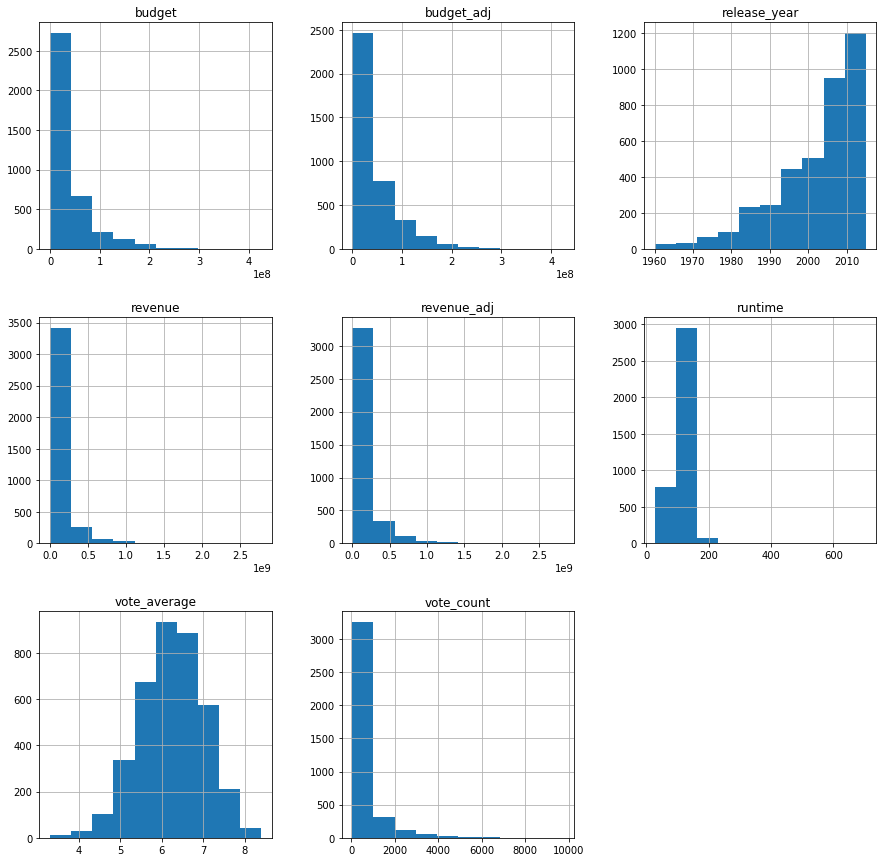

In [34]:
# Histogram of budget, revenue, runtime, release year, ratings and number of votes
df.hist(figsize = (15,15));

In [35]:
# Top 5 most popular rating values along with number of movies which got that rating value.
df.vote_average.value_counts().head()

6.5    209
6.2    202
6.3    190
6.1    187
6.4    183
Name: vote_average, dtype: int64

#### Droping null values:

In [36]:
df[df.cast.isna()]

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1088,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,83,Documentary,70,7.8,2014,0.0,1.384967e+06


In [37]:
df.drop(index = 1088, inplace = True)

In [38]:
df.sample()

,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
6225,0,3154346,Hooligans,Elijah Wood|Claire Forlani|Charlie Hunnam|Ross...,Lexi Alexander,109,Drama|Crime,384,7.0,2005,0.0,3.522027e+06


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 10848
Data columns (total 12 columns):
budget            3802 non-null int64
revenue           3802 non-null int64
original_title    3802 non-null object
cast              3802 non-null object
director          3802 non-null object
runtime           3802 non-null int64
genres            3802 non-null object
vote_count        3802 non-null int64
vote_average      3802 non-null float64
release_year      3802 non-null int64
budget_adj        3802 non-null float64
revenue_adj       3802 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 386.1+ KB


In [40]:
df.to_csv('imdb_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis
<a id='quest1'></a>
### Research Question 1 : Does length of the movie `runtime` plays any role in the `Ratings`.

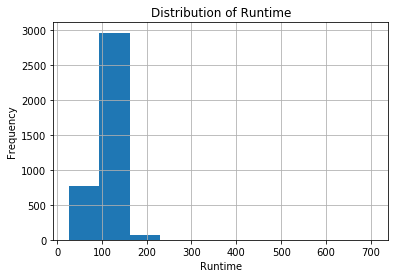

In [41]:
df.runtime.plot(kind = "hist", title = "Distribution of Runtime", grid= True)
plt.xlabel('Runtime');

In [42]:
df.runtime.describe()

count    3802.000000
mean      109.029458
std        21.537292
min        26.000000
25%        96.000000
50%       105.000000
75%       119.000000
max       705.000000
Name: runtime, dtype: float64

### Removing outliers from Runtime.
- We are taking `99 percentile` of our runtime to get a better estimation of the relationship between runtime and rating.
- Just to remove some `outliers` and some are `TV Series` rather than `movies`.

In [43]:
np.percentile(df.runtime, 99)

173.97999999999956

In [44]:
df_runtime = df.query('runtime < 173.94')

In [45]:
df_runtime = df_runtime[ ['runtime', 'vote_average']]

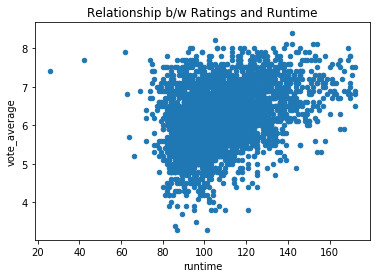

In [46]:
df_runtime.plot(x='runtime', y='vote_average', kind='scatter', title = "Relationship b/w Ratings and Runtime");

In [47]:
# Correlation between runtime and rating
np.corrcoef(df_runtime.runtime, df_runtime.vote_average)[0][1]

0.33873539530882146

### Findings:
- So far, weak correlation.

In [48]:
np.corrcoef(df_original.runtime, df_original.vote_average)[0][1]

0.15683517800816754

In [49]:
df_runtime.describe()

,runtime,vote_average
count,3763.000000,3763.000000
mean,108.045442,6.224502
std,17.398641,0.759963
min,26.000000,3.300000
25%,95.000000,5.700000
50%,105.000000,6.200000
75%,118.000000,6.800000
max,172.000000,8.400000


In [50]:
# Breaking the runtime into categorical classes to further exploration
bin_edges =[26,90,120,150,172]
bin_names = ['<1.5 h','1.5-2 h', '2-2.5 h', '2.5 h+']
# creating movie_length column

df_runtime['movie_length'] = pd.cut(df_runtime['runtime'], bin_edges, labels = bin_names)

In [51]:
df_runtime.head()

,runtime,vote_average,movie_length
0,124,6.5,2-2.5 h
1,120,7.1,1.5-2 h
2,119,6.3,1.5-2 h
3,136,7.5,2-2.5 h
4,137,7.3,2-2.5 h


<a id="distribution"> </a>

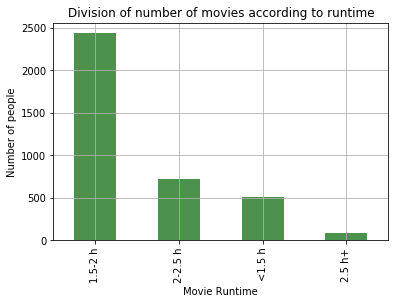

In [52]:
# Categorical runtime bar chart

df_runtime.movie_length.value_counts().plot(kind='bar', alpha = 0.7, color='darkgreen', label='movie_length', grid=True);
plt.ylabel('Number of people')
plt.xlabel('Movie Runtime')
plt.title('Division of number of movies according to runtime');

In [53]:
# Same as above in numerical form
df_runtime.movie_length.value_counts()

1.5-2 h    2435
2-2.5 h     724
<1.5 h      514
2.5 h+       89
Name: movie_length, dtype: int64

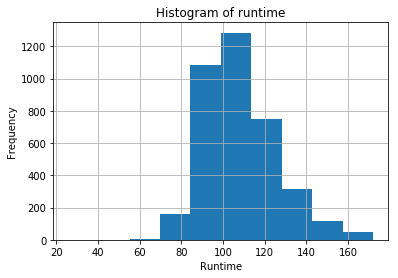

In [54]:
df_runtime.runtime.plot(kind= 'hist', grid= True, title='Histogram of runtime')
plt.xlabel('Runtime');

In [55]:
# Average runtime and ratings with respect of each category of runtime
df_length = df_runtime.groupby('movie_length').mean()
df_length

,runtime,vote_average
movie_length,,
<1.5 h,85.535019,5.913813
1.5-2 h,104.180287,6.150678
2-2.5 h,130.770718,6.599033
2.5 h+,159.853933,6.978652


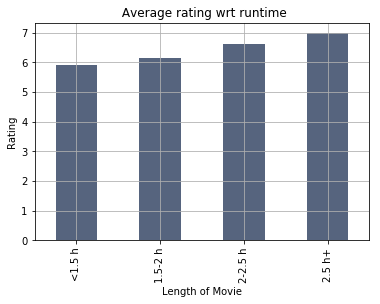

In [56]:
# bar chart of the above data
df_runtime.groupby('movie_length').vote_average.mean().plot(kind='bar', grid= True, title=' Average rating wrt runtime', alpha= 0.7 ,color = '#0f2347')
plt.xlabel('Length of Movie')
plt.ylabel('Rating');

### Findings:
- 2435 movies are between 1 hour 30 minutes and 2 and only 1 movie is less than 1 hour.
- Very unevenly divided.
    - Majority movies are between 80 to 140 minutes long.
    - Only 1 movie below 1 hour of runtime.
- a noticible correlation between movie rating and runtime ( *correration factor* : 1.33).

### As the trend shows, if the movie length (runtime) is more, chances are ratings will be better.

**Can't predict the `ratings` based on runtime alone**.

<a id='quest2'></a>
## Research Question 2 : Does `Finances (budget, revenue)` of the movie plays any role in improving movie `Ratings`.

In [57]:
df.budget.describe()

count    3.802000e+03
mean     3.574583e+07
std      4.331548e+07
min      0.000000e+00
25%      6.000000e+06
50%      2.107500e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [58]:
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [59]:
# New dataframe strictly for financial analysis and ratings.
df_finance = df[['budget', 'revenue', 'runtime','vote_count', 'vote_average']]
df_finance.head()

,budget,revenue,runtime,vote_count,vote_average
0,150000000,1513528810,124,5562,6.5
1,150000000,378436354,120,6185,7.1
2,110000000,295238201,119,2480,6.3
3,200000000,2068178225,136,5292,7.5
4,190000000,1506249360,137,2947,7.3


In [60]:
df_finance.describe()

,budget,revenue,runtime,vote_count,vote_average
count,3.802000e+03,3.802000e+03,3802.000000,3802.000000,3802.000000
mean,3.574583e+07,1.107910e+08,109.029458,550.292215,6.233719
std,4.331548e+07,1.768983e+08,21.537292,877.122221,0.764439
min,0.000000e+00,2.000000e+00,26.000000,41.000000,3.300000
25%,6.000000e+06,1.614524e+07,96.000000,100.000000,5.700000
50%,2.107500e+07,4.978844e+07,105.000000,230.000000,6.300000
75%,5.000000e+07,1.283182e+08,119.000000,588.750000,6.800000
max,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000


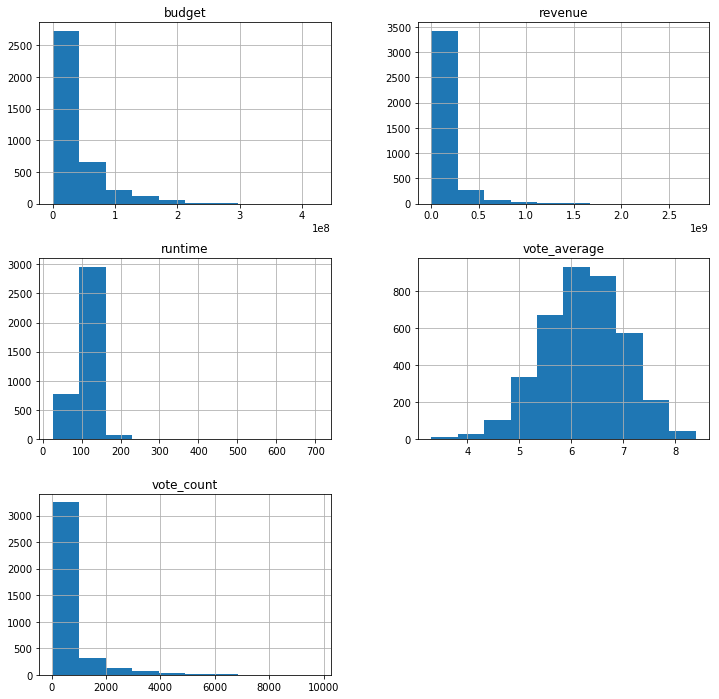

In [61]:
# Histogram of features of this new dataframe
df_finance.hist(figsize=(12,12));

#### Units of Budget and Revenue should change.
As Budget is in millions of dollars we need to change the unit of budget, revenue in millions for better analysis.

In [62]:
col = ['budget', 'revenue']
for c in col:
    df_finance[c] = df_finance[c]/1000000

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
df_finance.columns

Index(['budget', 'revenue', 'runtime', 'vote_count', 'vote_average'], dtype='object')

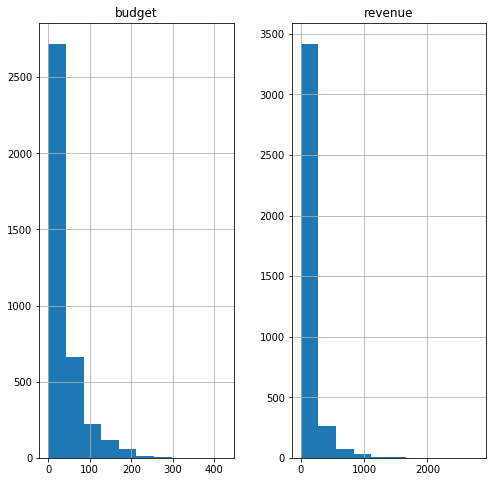

In [64]:
df_finance[col].hist(figsize=(8,8));

### Relationship between `budget` and `vote_average`

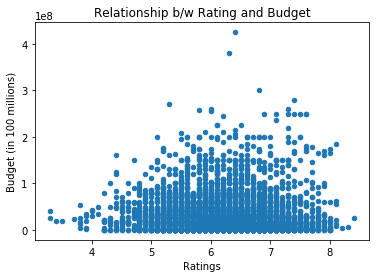

In [65]:
df.plot(x= 'vote_average', y= 'budget', kind='scatter', title='Relationship b/w Rating and Budget');
plt.xlabel('Ratings')
plt.ylabel('Budget (in 100 millions)');

In [66]:
np.corrcoef(df_finance.vote_average, df_finance.budget)[1][0]

-0.013986030326190538

### NO correlation between budget and rating
- It seems budget has no effect on ratings.

### Lets see if `budget` causes any changes in `revenue`.

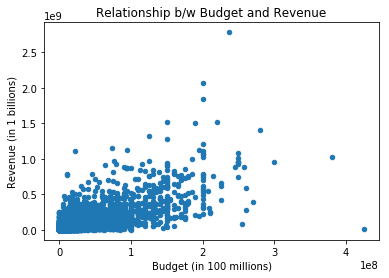

In [67]:
df.plot(x='budget', y='revenue', kind='scatter', title='Relationship b/w Budget and Revenue')
plt.xlabel('Budget (in 100 millions)')
plt.ylabel('Revenue (in 1 billions)');

In [68]:
np.corrcoef(df_finance.budget, df_finance.revenue)[0][1]

0.68790109646009023

### Now we see what `big Budget` produces, `Huge Revenue`. BIG CORRELATION .
- We get this, big budget better chances to get higher returns.

### Let's see if big budget get's more popularity.

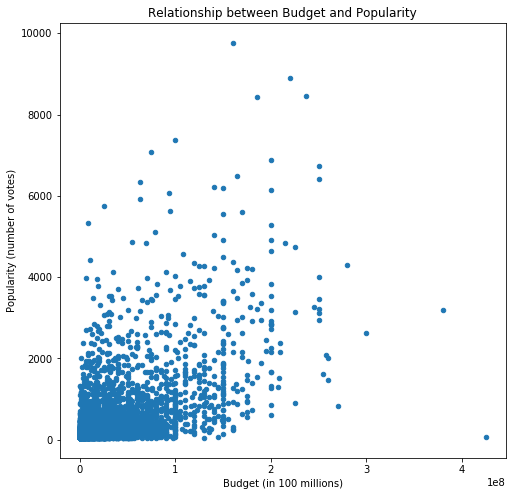

In [69]:
df.plot(x='budget', y='vote_count', kind='scatter', title='Relationship between Budget and Popularity', figsize= (8,8));
plt.xlabel('Budget (in 100 millions)')
plt.ylabel('Popularity (number of votes)');

In [70]:
np.corrcoef(df_finance.budget, df_finance.vote_count)[0][1]

0.55670394743095963

#### We can clearly see a relationship between budget and movie being popular
- Nearly 56% correlation between `budget` and `popularity` of the movie.

#### Relationship between  `ratings` and `revenue`

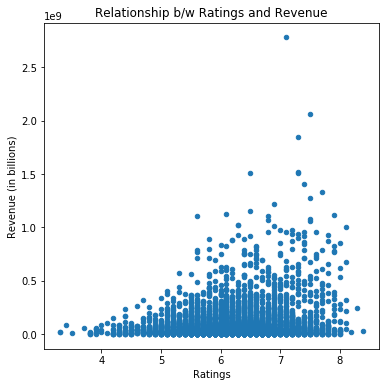

In [71]:
df.plot(x = 'vote_average', y='revenue', kind='scatter', title='Relationship b/w Ratings and Revenue', figsize = (6,6))
plt.xlabel('Ratings')
plt.ylabel('Revenue (in billions)');

In [72]:
np.corrcoef(df_finance.vote_average, df_finance.revenue)[0][1]

0.18894938849757065

### Almost non-existant correlation between `Ratings` and `Revenue`.
- Around `19%` correlation, which is very less.
- Since there is a very huge correlation between budget and revenue, and almost no correlation between budget and rating, we can say that, some people went to see movie if the rating is good.

## Findings:
- 2435 movies are between 1 hour 30 minutes and 2 and only 1 movie is less than 1 hour.
- Very unevenly divided.
    - Majority movies are between 80 to 140 minutes long.
    - Only 1 movie below 1 hour of runtime.
- Very weak correlation between movie rating and runtime ( *correration factor* : 1.33).

### As the trend shows, if the movie is length is more, chances are ratings will be better**.

**Can't predict the `ratings` based on runtime alone**.

## Final Conclusion :

- `No Correlation` between `budget` and `ratings`.
- `Big Correlation` between `budget` and `revenue`.
- `Correlation` between `budget` and movie getting `popular`.
- `Very Weak` (.19), almost non-existant correlation between `rating` and `revenue`.
- **We can say with slight confidence that, more people went to see movie when the rating is good**.

<a id='quest3'></a>
## Research Question 3  : Role of `Director`, in the movie `Ratings`.

In [73]:
df_director = df[['budget', 'revenue', 'director', 'runtime', 'vote_count', 'vote_average']]

In [74]:
df_director.head()

,budget,revenue,director,runtime,vote_count,vote_average
0,150000000,1513528810,Colin Trevorrow,124,5562,6.5
1,150000000,378436354,George Miller,120,6185,7.1
2,110000000,295238201,Robert Schwentke,119,2480,6.3
3,200000000,2068178225,J.J. Abrams,136,5292,7.5
4,190000000,1506249360,James Wan,137,2947,7.3


In [75]:
# list of 15 most popular directors
drts = df_director.director.value_counts().keys()[:15]

### These are the 15 most popular directors:

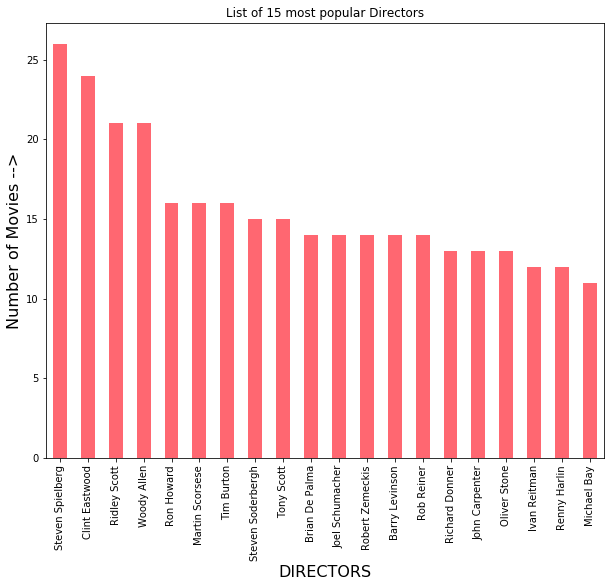

In [76]:
df_director.director.value_counts()[:20].plot(kind='bar', figsize=(10,8), color = '#ff414d', alpha= 0.8, title='List of 15 most popular Directors')
plt.xlabel('DIRECTORS', fontsize = 16)
plt.ylabel('Number of Movies -->', fontsize = 16);

In [77]:
# dictionary containing the average ratings of the movies directed by 15 most experienced directos.
drts_dict = {}
for d in drts:
    #rating = df_director.query('director == str(d)').mean()
    rating = df_director[df_director['director'] == d].vote_average.mean()
    print(rating)
    #drts_dict.append(d, rating)
    drts_dict[d]= rating

6.84230769231
6.67916666667
6.55714285714
6.71904761905
6.4875
7.20625
6.5875
6.22
6.42
6.47142857143
6.02142857143
6.79285714286
6.00714285714
6.68571428571
6.36153846154


In [78]:
drts_dict

{'Steven Spielberg': 6.8423076923076929,
 'Clint Eastwood': 6.6791666666666663,
 'Ridley Scott': 6.5571428571428569,
 'Woody Allen': 6.71904761904762,
 'Ron Howard': 6.4874999999999998,
 'Martin Scorsese': 7.2062500000000007,
 'Tim Burton': 6.5875000000000004,
 'Steven Soderbergh': 6.2199999999999998,
 'Tony Scott': 6.419999999999999,
 'Brian De Palma': 6.4714285714285706,
 'Joel Schumacher': 6.0214285714285722,
 'Robert Zemeckis': 6.7928571428571436,
 'Barry Levinson': 6.007142857142858,
 'Rob Reiner': 6.6857142857142851,
 'Richard Donner': 6.361538461538462}

In [79]:
# sorting according to descending order of ratings.
drts = sorted(drts_dict.items(), key=lambda x: x[1],reverse= True) 

In [80]:
drts_dict = dict(drts)
drts_dict

{'Martin Scorsese': 7.2062500000000007,
 'Steven Spielberg': 6.8423076923076929,
 'Robert Zemeckis': 6.7928571428571436,
 'Woody Allen': 6.71904761904762,
 'Rob Reiner': 6.6857142857142851,
 'Clint Eastwood': 6.6791666666666663,
 'Tim Burton': 6.5875000000000004,
 'Ridley Scott': 6.5571428571428569,
 'Ron Howard': 6.4874999999999998,
 'Brian De Palma': 6.4714285714285706,
 'Tony Scott': 6.419999999999999,
 'Richard Donner': 6.361538461538462,
 'Steven Soderbergh': 6.2199999999999998,
 'Joel Schumacher': 6.0214285714285722,
 'Barry Levinson': 6.007142857142858}

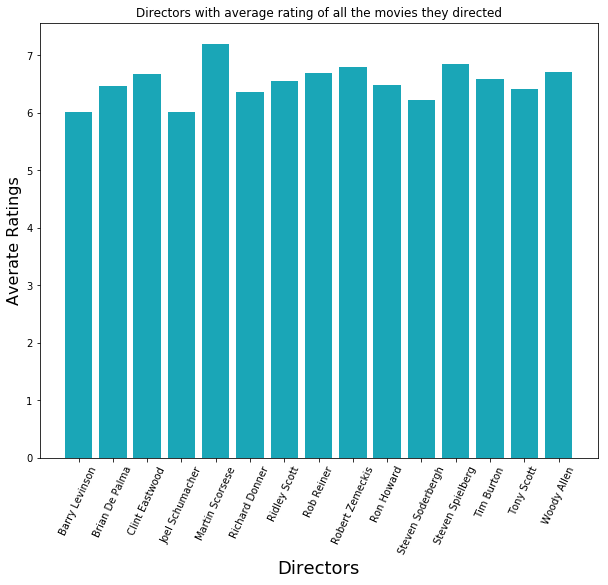

In [81]:
fig, ax = plt.subplots(figsize = (10,8))

ax.bar(*zip(*drts_dict.items()), color='#1aa6b7')
idx = drts_dict.keys()
ax.set_xticks(list(idx))
ax.set_xticklabels(list(drts_dict.keys()),rotation=65)
ax.set_xlabel('Directors', fontsize= 18)
ax.set_ylabel('Averate Ratings', fontsize = 16)
ax.set_title('Directors with average rating of all the movies they directed')
plt.show()


## Findings :
- Amongst the 15 most popular directors, in terms of ratings these are the top directors in terms of average `Ratings`:
#### Martin Scorsese is #1 with `7.21` average rating.
#### Steven Spielberg is #2 with `6.8` average rating.
#### Robert Zeneckis is #3 with `6.79` average rating.

## Limitations
**The conclusion present in the next sections have some limitations**. 
The conclusion we made about the  relationship between runtime and rating was unbalanced, it was not evenly distributed. Majority of the movies are between 80 to 140 minutes long. You can see the distribution of movies in this <a href = "#distribution">section</a>. There were movies with budget and revenue equal to zero as the data is unavailable. Due to this our dataset is reduced to 1/3rd the size. Due to the smaller dataset, our conclusion has limitations. Some of the conclusions are based on correlations, but since we know, correlation can't be always linked with causation. Further analysis is required in that cases.


<a id='conclusions'></a>
# Conclusions
**We were looking for factors that may lead to better ratings, here is what we concluded**.

### 1. Movies with longer runtime have slightly better ratings.

- Majority movies are between 80 to 140 minutes long.


**\*Can't predict the `ratings` based on runtime alone**( *correration factor* : 1.33).
### 2. It has a range of findings :

- No Correlation between `budget` and `ratings`.
- Big Correlation between `budget` and `revenue`.
- Correlation between `budget` and movie getting `popular`.
- Very Weak (.19), almost non-existant correlation between `rating` and `revenue`.
- **We can say with slight confidence that, more people went to see movie when the rating is good**.


### 3. Amongst the 15 most popular directors, in terms of ratings these are the top directors in terms of average `Ratings`:
#### Martin Scorsese is #1 with `7.21` average rating.
#### Steven Spielberg is #2 with `6.8` average rating.
#### Robert Zeneckis is #3 with `6.79` average rating.

In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0